# Constraint Analysis - Calculating_Thrust_to_Weight_ratios

Reference: 
<ol><li><a href="https://books.google.com/books?id=XtU4HVnWeZIC&pg=PA57&lpg=PA57&dq=MS+Dos+program+for+airplane+Performance+Assessment&source=bl&ots=CgCfVzvNZP&sig=ACfU3U1OXvFW83ZYDGyV1CxHTV9blSkmkA&hl=en&sa=X&ved=2ahUKEwjDlZrS07fkAhXVIDQIHVCnB-QQ6AEwDXoECAgQAQ#v=onepage&q=MS%20Dos%20program%20for%20airplane%20Performance%20Assessment&f=false">General Aviation Aircraft Design: Applied Methods and Procedures</a></li>
<li><a href="https://www.ecfr.gov/cgi-bin/text-idx?SID=685dc1ae97ae3f5e5569e47880fab01e&mc=true&node=pt14.1.23#_top">PART 23—AIRWORTHINESS STANDARDS: NORMAL CATEGORY AIRPLANES</a></ol>

Author: Robert Bumpous.  
MIT License applies. 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Constraint-Analysis---Calculating_Thrust_to_Weight_ratios" data-toc-modified-id="Constraint-Analysis---Calculating_Thrust_to_Weight_ratios-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Constraint Analysis - Calculating_Thrust_to_Weight_ratios</a></span></li><li><span><a href="#The-Problem" data-toc-modified-id="The-Problem-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>The Problem</a></span><ul class="toc-item"><li><span><a href="#Aircraft-Requirements" data-toc-modified-id="Aircraft-Requirements-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Aircraft Requirements</a></span></li><li><span><a href="#Only-change-Variable-Values-in-the-next-2-code-cells-!!!" data-toc-modified-id="Only-change-Variable-Values-in-the-next-2-code-cells-!!!-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Only change Variable Values in the next 2 code cells !!!</a></span></li></ul></li><li><span><a href="#Solution:" data-toc-modified-id="Solution:-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Solution:</a></span><ul class="toc-item"><li><span><a href="#Compute-the-T/W-for-Takeoff" data-toc-modified-id="Compute-the-T/W-for-Takeoff-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Compute the T/W for Takeoff</a></span></li><li><span><a href="#Compute-the-T/W-for-initial-climb-after-takeoff" data-toc-modified-id="Compute-the-T/W-for-initial-climb-after-takeoff-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Compute the T/W for initial climb after takeoff</a></span></li><li><span><a href="#Compute-the-T/W-required-for-a-desired-Cruise-Speed" data-toc-modified-id="Compute-the-T/W-required-for-a-desired-Cruise-Speed-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Compute the T/W required for a desired Cruise Speed</a></span></li><li><span><a href="#Computing-the-T/W-for-Maneuvers-(level-turns-at-constant-velocity)" data-toc-modified-id="Computing-the-T/W-for-Maneuvers-(level-turns-at-constant-velocity)-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Computing the T/W for Maneuvers (level turns at constant velocity)</a></span></li><li><span><a href="#Computing-the-T/W-for-the-given-Service-Ceiling" data-toc-modified-id="Computing-the-T/W-for-the-given-Service-Ceiling-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Computing the T/W for the given Service Ceiling</a></span></li><li><span><a href="#Plot-the-T/W-for-all-of-our-various-states" data-toc-modified-id="Plot-the-T/W-for-all-of-our-various-states-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Plot the T/W for all of our various states</a></span></li></ul></li><li><span><a href="#Compute-and-Plot-the-Engine-Horsepower" data-toc-modified-id="Compute-and-Plot-the-Engine-Horsepower-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Compute and Plot the Engine Horsepower</a></span><ul class="toc-item"><li><span><a href="#Individual-Test-Case" data-toc-modified-id="Individual-Test-Case-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Individual Test Case</a></span></li><li><span><a href="#Stall-Speed-limits" data-toc-modified-id="Stall-Speed-limits-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Stall Speed limits</a></span><ul class="toc-item"><li><span><a href="#CLmax-for-a-desired-stall-speed" data-toc-modified-id="CLmax-for-a-desired-stall-speed-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>CLmax for a desired stall speed</a></span></li></ul></li><li><span><a href="#Saving-our-data" data-toc-modified-id="Saving-our-data-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Saving our data</a></span></li></ul></li></ul></div>

This workbook is based on equations from <u>General Aircraft Design: Applied Methods and Procedures</u> Chapter 3 Constraint Analysis and Example 3-1 on Page 64, ref 1 above.  This chapter contains constraint equations that relate the thrust loading, thrust to weight ratio (T/W or tw for ease of use with Python) of an aircraft, to its wing loading, weight to reference surface area ratio (W/S or ws for ease of use with Python) at several critical (from a conceptual design standpoint) stages of flight.  I have rearranged the equations in the order they would take place in a normal flight to make it easier for me to keep track. The stages are:
<li>Takeoff T/W</li>
<li>Climb T/W</li>
<li>Cruise T/W</li>
<li>Maneuver (level constant velocity turns) T/W</li>
<li>Service Ceiling (at Rate of Climb = 100 fpm or 0.508 m/s) T/W</li>

I wrote this python code initially to see if I could solve example 3-1 in reference 1 using python.  I then modified the code by adding Numpy and converting the tw and ws variables into arrays.  I then predefined a set of ws array variables to use to compute tw.  I then used equations in ref 1  to convert and plot the values of ws and tw into values for engine horsepower vs wing loading wing and to de-rate the engine horsepower from that at altitude to that at sea level for the maneuver case (level, constant rate turns at altitude).  I then added an end section that extracts the pw and ws for a particular set of the above values and used that, along with the airplane takeoff weight (MTOW) and aspect ratio (ar) to compute wing span (b), wing reference area (s_ref), stall speed (v_stall), and required maximum coefficient of lift (C_Lrot) for the aircraft.

Future: I plan to add a capability to write the output data from this notebook to a disk file, but haven't done so yet.


# The Problem

One of the problems encountered at the conceptual or even the preliminary design stage is that the geometry of the aircraft is mostly unknown.  As a result, the designer can only estimate some basic values needed for the aircraft design calculations such as  estimated minimum drag coefficient $C_{Dmin}$, Drag Coefficient at lift off $C_{Drot}$, or Lift Coefficient at lift off $C_{Lrot}$ , and the Lift induced drag constant $k$. However, we can estimate these quantities by looking to existing aircraft of the same class as those being designed.

Below, we will document our aircraft requirements and define our assumptions about the characteristics of our aircraft.  In a Markdown cell, then in a Code cell as Python variables.  Following that code cell will be one that allows us to select a test case for detail analysis. Section 3 contains the Python Solution, i.e. Python and Numpy code to solve the T/W vs W/S equations for a range of ws between 2 and 58 Lb per sq ft.  This W/S range can be changed in the code below, but is generally applicable to most LSA, Normal Category, and personal experimental aircraft.

I have separated each section of code by a markup cell containing a header, and possibly some comments about the code that follows to enable the NBextensions Table of Contents to build an TOC for the notebook.

I have isolated a set of print commands in the cell following each calculation, to enable testing of the data.  The ref 1, example was set up at wing loading (W/S) of 10 lbs / sqft, so I have the initial test case set to extract this value from the W/S and T/W arrays so we can compare the results with the example to verify the coding of the equations.  I have also included plot statements so each individual calculation can be plotted for testing purposes.  

Dia 1. Constraint diagrams plot Thrust Loading (vertically range 0.00 to 0.45) vs wing loading (horizontal range 2 to 58 lb per sq ft).  

Dia 2. BHP (vertical 0 - 350 BHP) vs Wing Loading (horizontal range 10 to 60 lb per sq ft).  

Dia 3. BHP vs W/S normalized for sea level.  this allows us to select an engine. 

Dia 4: Sea Level BHP and Stall Speed Requirements

<li>v_to and v_rot are considered the same for the purposes of conceptual design. This is typically the aircraft speed when the pilot rotates the aircraft on takeoff and is typically 1.05*v_stall. For a <b>normal</b> category aircraft, v_stall is defined by the FAA as no greater than 61 kts.  Consequently v_rot or v_to is normally about 65 kts for certified personal aircraft.</li>
<li>roc is the rate of climb (vetical speed) at the best rate of climb speed (speed relative to the air). </li>
<li>v_max is the maximum safe speed of the aircraft, it occurs at the alt_max_speed, which for the example was given as the cruise altitude.</li>
<li>v_man is the speed we use for level, constant velocity turns at alt_man. The g force generated by this turn is given by 'n'.  Typically, the maximum bank angle is 60 degrees, which gives a 2 g turn.  In the example, v_man was given as v_max.  and alt_man was the same as alt_max. </li>
<li>v_sc is typically v_best = v_climb best rate of climb velocity.  Vertical Speed at SC is defined in the US as 100 fpm.</li> 

<b>Note:</b> I have tried to use small letters for most of the variables, so as to not conflict with the Python naming conventions.  However, these variables are generally shown as capitals in the equations in section 3.  

<b>Note:</b> We have added separate values of speed and altitude for each of our flight stages, so that the user can change them below and rerun the notebook for different flight conditions.  

<b>Note:</b> Generally, for design purposes, takeoff altitude is considered to be at sea level. However in designing a real airplane, you might want to consider that in the US, paved airports can range in altitude from
   <li>Furnace Creek Airport, DEATH VALLEY, CA, -210' MSL (210 below sea level)  to</li> 
   <li>Lake County airport at Leadville, CO +9,934'</li> 
          
Unpaved runways can be higher, and possibly lower.  World wide, airports range from about 1200 feet below sea level to about 15,000 feet above sea level. 

<b>Note:</b> ICAO (International Civil Aviation Organization) is a UN-body which focusses on international harmonization of civil aviation regulations. ... IATA (International Air Transport Association) is a trade association that focusses on making air traffic businesses safe, secure, reliable and efficient. FAA (Federal Aviation Administration) defines the <b>minimum</b> requirements for aircraft flying in the US airspace, among other things. 


## Aircraft Requirements

For a single piston-engine propeller aircraft with the following design requirements (given by Ref 1).
<ol> Design Requirements
    <li> Design Gross Weight shall be 2000 lbs</li>
    <li> Aircraft must sustain a 2g constant velocity turn while cruising at 150 KTAS at 8000 ft. (60 degree bank turn)</li> 
    <li> Aircraft must be capable of climbing at least 1500 fpm at 80 KCAS at sea level.</li> 
    <li> Aircraft must be capable of operating from short runways where the ground roll is less than 900 feet and liftoff speed of 65 KCAS (~105% of v_stall) at design gross takeoff weight(MTOW).</li> 
    <li> Aircraft must be capable of a cruise speed of at least 150 KTAS at 8000 ft.</li>
    <li> Aircraft must be capable of a maximum speed of at least 170 KTAS at 10,000 ft.</li>
    <li> Aircraft must be capable of a service ceiling of at least 20,000 ft.</li>
</ol>
<ul> Design Assumptions        
    <li> An aspect ratio (AR) of 9.0 </li> 
    <li> The design should have a minimum drag coefficient ($C_{Dmin}$) of 0.025.</li> 
    <li> The takeoff ground friction of 0.04.</li>
    <li> The Takeoff Lift coefficient ($C_{LTO}$) is 0.5</li>
    <li> The Takeoff Drag coefficient ($C_{DTO}$) is 0.04</li>
    <li>Propeller Efficiency is ($np$) is 0.80 %</li>
    </ul>

## Only change Variable Values in the next 2 code cells !!!

This workbook is (theoretically) designed to allow a user to change nothing except the value of variables in the following code cells in order to analyze many different aircraft configurations.  <b><i>Unless you are extending the workbook, every value you might need to change should be in this cell.</i></b> If you find you need to change a variable that is not in this cell, please contact me so we can fix it.

In [12]:

###############################
#### Aircraft Requirements ####
###############################

# from markup cell above.  Single Engine prop aircraft requirements
MTOW = 2000 #lbs MTOW (Maximum Takeoff Weight)
n = 2 # = 2g load factor at v_cruise KTAS and alt_cruise ft.
roc_sl = 1500 # feet per min (fpm) rate of climb at sea level
roc_sc = 100 # feet per min (fpm) rate of climb at service ceiling

gnd_run = 900 # feet maximum ground run with liftoff speed of 65 KCAS.

v_stall = 61 # Stall speed in knots.
v_to = 65 #KCAS at MTOW Lift off speed at maximum gross takeoff weight.

v_best_roc = 80 # KCAS Speed for best rate of climb in fpm.
v_climb = v_best_roc
v_best_aoc = 70 # KCAS Speed for best angle of climb *** NOT CURRENTLY USED ***

v_cruise = 150 #KTAS cruise speed at cruise altitude {alt_cruise} ft. 
v_man = 150 # KTAS
v_max = 170 # KTAS *** NOT CURRENTLY USED ***
v_sc = v_best_roc # KCAS

alt_to = 0 # Generally the takeoff altitude is considered to be at sea level. (for instance, KRNT at Renton Wa = 40')
alt_climb = 0 # the altitude we use to compute or climb.
alt_cruise = 8000 # feet. Cruise altitude for this exercise in feet.
alt_max_speed = 10000 # feet the altitude where we compute the horsepower for maximum speed.*** NOT CURRENTLY USED ***
alt_man = 8000 # feet. maneuver altitude for this exercise.
alt_sc = 20000 # Service Ceiling altitude for this exercise in feet.

###############################
####  Initial Assumptions  ####
###############################
ar = 9.0 # Aspect Ratio
C_Dmin = 0.025# target minimum drag coefficient.
C_DTO = 0.04 # Drag Coefficient at lift off.
C_LTO = 0.5 # Lift Coefficient at lift off.
gnd_fric = 0.04 # initial runway friction estimate.
np = 0.80 # Propeller efficiency.

<b>Note:</b> The test case cell below can be executed  and a new individual case examined without compiling the arrays.  This cell allows the user to pick a single W/S and consequently T/W value from the arrays.  These are then used in the individual test case. The Individual Case code would have to be reexecuted in order to pull different test cases from the arrays.

In [13]:
# Below we have define the size of our wing loading (W/S ) array.  With the initial settings of 
# x_start, x_end = 0.0, 60.0  and n_ws = 50, setting our test case to 7 produces WS[7]=10 lb/sq ft, which was
# the example we started from.  This allows us to verify the values in our array computations at
# one wing loading value.  If the values match those given in the example, this should verify we have
# coded the equations correctly.  After the code is debugged, this value can be changed to extract the
# engine power required information for a particular test case, different than this. 
#
# Which will allow us to extract the values from our plots analytically, rather than visually!

test_case = 7

# This value is in a different cell so we have it in only one place that is easily changable.   

# Solution:

The solution has been modified in this notebook to take advantage of numpy and expand the Ref 1 Example 3-1 solution to include a range of T/W and W/S options.  Using this data, we can plot the T/W as a function of W/S for a variety of situations, takeoff run, climb, sustained turns, etc and identify, for our particular requirements, acceptable T/W and W/S cases. 

<b>Setup:</b>

In [14]:
###############################
####  Aviation Constants   ####
###############################
g = 32.174 #acceleration due to gravity in feet per sec squared.
rho_sl = 0.002378

In [15]:
# Plot and print labels:
label_ws = 'Wing Loading, W/S in lbf/sq ft.'
label_tw = 'Thrust Loading, T/W'
label_bhp = 'Brake-horsepower Required, BHP'
label_vs = 'Required CLmax'

# Here are the various flight conditions we are interested in.
st =['Takeoff',
      'Climb',
      'Cruise',
      'Maneuver',
      'Service Ceiling'
     ]
plot_titles = ['T/W vs W/S for takeoff ground run',
               'T/W vs W/S for climb',
                'T/W vs W/S for cruise',
                'T/W vs W/S for maneuver',
                'T/W vs W/S for service ceiling']
diag_titles = ['Dia 1: Constraint Diagram',
               'Dia 2: Brake Horsepower (BHP) Requirements',
               'Dia 3: Sea Level BHP (Brake Horsepower) Requirements',
               'Dia 4: Sea Level BHP and Stall Speed Requirements']

In [16]:
# Notebook imports. 
import math
# Add the following import to change notebook from analysis of one variable to analysis over a range of values.
import numpy
# Since we are going to want to plot our results, we import pyplot from matplotlib.
from matplotlib import pyplot
# display the figures in the Notebook
%matplotlib inline

# Create a list to put our various altitudes of interest in as we run the computations.  We want this
# so we can print out the altitude used for the rho (alt) functions. for verification.
altitude=[alt_to, alt_climb, alt_max_speed, alt_man, alt_sc] # create an array of altitudes for our aircraft states.

# Now create the grid that we will plot our values against.
N_x = 20                         # Number of points in x-direction
N_y = 15                         # Number of points in y-direction

x_start, x_end = 0.0, 60.0       # boundaries of the x-direction -- Wing Loading W/S in lbf/sq ft.
y_start, y_end = 0.0, 0.45       # boundaries of the y-direction -- Thrust Loading T/W 
y_start_bhp, y_end_bhp = 0, 350  # boundaries of the y-direction -- Brake-horsepower Loadin P/W in brake horsepower.
y_start_stall, y_end_stall = 0.0, 3.0       # boundaries of the y-direction -- Thrust Loading T/W 

x = numpy.linspace(x_start, x_end, N_x)    # Create the x array, from x_start to x_end with N points.
y = numpy.linspace(y_start, y_end, N_y)    # Create the y array, from y_start to y_end with N points.
y_p = numpy.linspace(y_start_bhp, y_end_bhp, N_y)    # Create the y array, from y_start to y_end with N points.

# Using Numpy create grids for our data plots.
# Use XX and YY to easily distinguish our axis grid from variables x and y.
# We need two grids, one for T/W vs W/S and one for BHP vs W/S.
XX, YY = numpy.meshgrid(x,y)
XX1, YY1 = numpy.meshgrid(x,y_p)

In [17]:
# Using numpy, build our array of W/S values.
n_ws = 50                        # Number of values of WS that we are going to compute.

ws = numpy.linspace(x_start+2, x_end-2, n_ws)    # computes a 1D-array for x

###############################################################################
### note: With x_start, x_end = 0.0, 60.0 and y_start, y_end = 0.0, 0.45   ####
### ws[7] should produce the same values in the individual case section    ####
### as was produced by the datapoint solution given in example 3.          ####
###############################################################################

In [18]:
# When we record our results, we are going to want to include the requirements that define the results, so 
#  here we build a function to print out these requirements.  Eventually, we will want to add code to save
#  these results to disk, for analysis in other programs.
def print_aircraft_requirements():
    print('\033[1m' + '\n\nAircraft Design Requirements' + '\033[0m\n'  )
    
    print('\n-Design Maximum Takeoff Weight (MTOW) is %4i pounds.' %(MTOW))
    
    print('\n-Design Stall Speed  (v_stall) is %4i KCAS' %(v_stall))
    
    print('-Design Speed for Takeoff (Rotation) (v_to) is %4i KCIA.' %(v_to))
    print('-Design Altitude for Takeoff (alt_to) is %4i feet' %(alt_to))
    
    print('-\nBest Rate of Climb (vertical speed) (roc_sl) is %4i feet per minute' %(roc_sl))
    print('-Speed for Best Rate of Climb (v-climb) is %4i KCAS.' %(v_best_roc))
    print('-Design Altitude for climb (alt_climb) is %4i feet' %(alt_climb))
    print('-Speed for Best Angle of Climb (v-best_aoc) is %4i KCAS.' %(v_best_aoc))
    
    print('\n-Cruise Speed (v_cruise) is %4i KTAS at an altitude of %4i' %(v_cruise, alt_cruise))
    print('-Design Altitude for cruise (alt_cruise) is %4i feet' %(alt_cruise))
    
    print('\n-Maneuver Speed (v_man) is %4i KTAS' %(v_man))
    print('-Design Altitude for maneuvers (level constant velocity turns) (alt_man) is %4i KCAS' %(alt_man))
    
    print('\n-Cruise Speed (v_cruise) is %4i KTAS' %(v_cruise))
    print('-Design Altitude for maximum speed (alt_max) is %4i KCAS' %(alt_cruise))
    
    print('\n-Service Ceiling is %4i KTAS at roc_sc %3i and %3i' %(alt_sc, roc_sc, v_best_roc))
    
    print('\033[1m' + '\n\nDesign Assumptions:\n' + '\033[0m'  )
    print('\n-Aspect Ratio (ar) is %3.1f ' %(ar))
    print('-Propeller efficiency (np) is %3.2f ' %(np))
    
    print('\033[1m' + '\nEstimated values\n''\033[0m')
    print('\n-Coefficient of lift at takeoff (C_LTO) is %4.1f.' %(C_LTO))
    print('-Coefficient of Drag at takeoff (C_DTO) is %5.4f.' %(C_DTO))
    print('-Coefficient of Drag minimum (C_Dmin) is %5.4f.' %(C_Dmin))
    print('-Runway or ground friction (gnd_fric) is %5.4f.' %(gnd_fric))

In [19]:
# This cell can be run to generate a plot of the values for T/W as a function of W/S, if needed for troubleshooting.  
# However this data will be plotted along with all the other flight profile cases in the Dia 1: Constraint Diagram.
# Generate individual plots of the various T/W vs W/S profile states of the aircraft.
def plot_individual_tw(tw, ws, title_str, color_chr='g'):
    width = 10.0
    height = width * (y_end - y_start) 
    pyplot.figure(figsize=(width, height))
    
    pyplot.grid(True)
    pyplot.xlabel(label_ws, fontsize=16)
    pyplot.ylabel(label_tw, fontsize=16)
    pyplot.title(title_str, fontsize=24)

    pyplot.xlim(x_start, x_end)
    pyplot.ylim(y_start, y_end)
    pyplot.plot(ws, tw, color=color_chr, linestyle='-', linewidth=4);

In [20]:
#__________________________________________________________________________
# Estimate the Oswald's span efficiency.
eff_O = 1.78*(1-0.045 * math.pow(ar, 0.68))-0.64
# Calculate the lift induced drag constant, k,.
k = 1/(math.pi*ar*eff_O)

In [21]:
def rho_altitude(alt):
    """
    Compute the (standard) atmospheric density at altitude.  (This computation assumes we start at standard
    ICAO temperature and pressure and that the pressure follows ICAO standard temperature and pressure drop for
    altitude (rho_sl pressure altitude at sea level is 0.002378 )
    Input
        alt:        The altitude for our flight state.
    Output
        rho_alt:    The pressure altitude for the given alt.
        
    """
     
    # ICAO Source: https://en.wikipedia.org/wiki/Standard_conditions_for_temperature_and_pressure
    # Air density at sea level at ICAO standard conditions of 29.92 inches of mercury and 59 degrees F.
    # Air density source: https://en.wikipedia.org/wiki/Density_of_air
    rho_sl =0.002378  # slug/(cu ft),
    # The effects of temp and local pressure are incorporated into the follow eq.
    rho_alt = rho_sl*math.pow((1-0.0000068756 *alt), 4.2561)
    return rho_alt

def q_altitude_velocity (alt, v_alt, to='False'):
    """
    Compute the dynamic pressure of the air at the air density and speed.  Takeoff is a special case where the
    speed is averaged over the takeoff run by dividing it by the square root of 2.  
    Inputs
        rho_alt:   Is the density altitude for whatever flight state we are computing.
        v_alt:     Is the velocity in KTAS (knots true air speed) for our flight state.
    Outputs
        q:         is the dynamic pressure at the flight state being analized.
        
    """
    rho_alt = rho_altitude(alt)
    v_fps = 1.688*v_alt # Convert our input speed in Knots to feet per second.
    
    # Takeoff is a special case.  We need to average the dynamic pressure during the takeoff run.
    if to=='True' or to=='true' :
        # On takeoff, we want the dynamic pressure to average over the takeoff run. 
        # to do this, we divide the takeoff (rotation) speed by the square root of 2.
        q = 0.5*rho_alt*math.pow((v_fps/math.sqrt(2)), 2)
    else:
        # In all other cases, the dynamic pressure is a dirct function of the air density and speed.
        q = 0.5*rho_alt*math.pow(v_fps, 2)
    return q, v_fps

## Compute the T/W for Takeoff

In [22]:
# Calculate the T/W required for takeoff for the array of wing loading W/S created 
# Takeoff at sea level at v_to followed by a climb at v_climb.

# Compute the dynamic pressure at the altitude and speed of the flight stage.
q_to, v_to_fps = q_altitude_velocity (alt_to, v_to, to='True')

tw_to = math.pow(v_to_fps, 2)/(2*g*gnd_run) + (q_to/ws)*C_DTO  + gnd_fric*(1-(q_to/ws)*C_LTO)

In [23]:
# plot_individual_tw(tw_to, ws, plot_titles[0], 'g')

## Compute the T/W for initial climb after takeoff

In [24]:
# Calculate the rate of climb T/W at sea level. Use the same wing loading as above, at the defined climb rate.

# Convert rate of climb roc_sl to fps.
roc_sl_fps = roc_sl/60 # Begin by noting that the Rate of Climb of 1500 fpm /60 s/min) 

# Compute the dynamic pressure at the altitude and speed of the flight stage.
q_climb, v_climb_fps = q_altitude_velocity(alt_climb, v_climb)

tw_climb =  roc_sl_fps/v_climb_fps + (q_climb/ws)*C_Dmin + (k/q_climb)*ws

In [25]:
# plot_individual_tw(tw_climb, ws, plot_titles[1], 'r')

## Compute the T/W required for a desired Cruise Speed

In [26]:
# Calculate the T/W required for cruise air speed at alt_cruise.

# Compute the dynamic pressure at the altitude and speed of the flight stage.
q_cruise, v_cruise_fps = q_altitude_velocity(alt_cruise, v_cruise)

tw_cruise = q_cruise*C_Dmin/ws + k*(ws/q_cruise)

In [27]:
# plot_individual_tw(tw_cruise, ws, plot_titles[2], 'k')

## Computing the T/W for Maneuvers (level turns at constant velocity)

In [28]:
#  Calculate values of T/W for an aircraft at cruise speed and altitiude 
# turning at 2 g, given an array of wing loading W/S = 2-58 lb/ft sq.
# Note: a 60 degree banking turn will produce this n = 2 = 1/cos(60).

# Compute the dynamic pressure at the altitude and speed of the flight stage.
q_man, v_man_fps = q_altitude_velocity(alt_man, v_man)
# Now compute the T/W for these conditions.
tw_man = q_man*((C_Dmin/ws) + k*ws*math.pow((n/q_man), 2))

In [29]:
# plot_individual_tw(tw_man, ws, plot_titles[3], 'b')

## Computing the T/W for the given Service Ceiling

<b>Note:</b> Although this example uses a Service Ceiling of 20,000 feet, I found the following on the internet from a commercial pilot. Source: https://www.quora.com/How-do-I-calculate-the-service-ceiling-of-an-aircraft

"You can proceed on the basis of some simple rules of thumb. If you are in a piston aircraft with no turbo charger, you better stay under 12,500 feet. You got some way to increase the boost? Maybe you can get up to 18,000. Flight level one eight zero.

Regional jet? Up to FL 380 without too much thought. The FAA might want you to not go too much higher if your aircraft has a history of high altitude issues….."

For a Cessna 172, the manual says the service ceiling is 14,200 ft.

In [30]:
# Calculate the T/W required for a service ceiling of alt_sc ft.

# Note: we can't use our q_altitude_velocity() function as neither q nor horizontal velocity are required for
# this calculation.

# First calculate the air density at out service ceiling.
rho_sc = 0.002378*math.pow((1-0.0000068756 *alt_sc), 4.2561)
# A maximum vertical speed of 100 fpm is the US definition of service ceiling.
roc_sc_fps = roc_sc/60  # fpm/60 = fps! 

a1 = (2/rho_sc)*ws
a2 = math.sqrt(k/(3*C_Dmin))
a = roc_sc_fps/(numpy.sqrt(a1*a2)) #Changed form math.sqrt to numpy.sqrt because ws is now an array.
b = 4*(numpy.sqrt((k*C_Dmin)/3))

tw_sc = a + b

In [31]:
# plot_individual_tw(tw_sc, ws, plot_titles[4], 'r')

## Plot the T/W for all of our various states

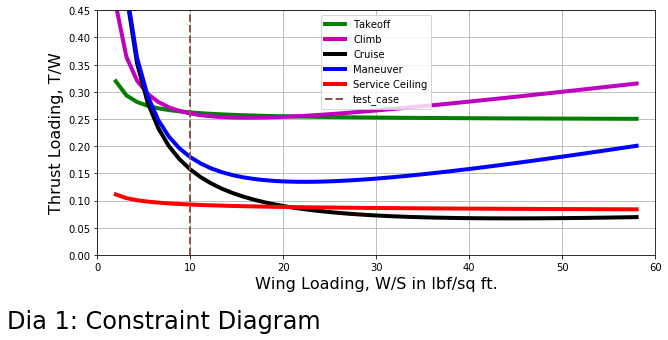

In [32]:
# Plot the above functions for various values of WS typically from 2 to 58.  
# Note. the region above the curve is the one we want. 

width = 10
height = width * (y_end - y_start)
fig = pyplot.figure(figsize=(width, height))
fig.text(0, -0.1, diag_titles[0], fontsize=24 )

pyplot.grid(True)
pyplot.xlabel(label_ws, fontsize=16)
pyplot.ylabel(label_tw, fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)

pyplot.plot(ws, tw_to, color='g', linestyle='-', linewidth=4, label=st[0])
pyplot.plot(ws, tw_climb, color='m', linestyle='-', linewidth=4, label=st[1])
pyplot.plot(ws, tw_cruise, color='k', linestyle='-', linewidth=4, label=st[2])
pyplot.plot(ws, tw_man, color='b', linestyle='-', linewidth=4, label=st[3])
pyplot.plot(ws, tw_sc, color='r', linestyle='-', linewidth=4, label=st[4])

pyplot.axvline(ws[test_case], color='tab:brown', linestyle='--', linewidth=2, label='test_case');

pyplot.legend(loc='best')
pyplot.show();


<b>Note:</b> The above plot appears to be identical to the  plot Figure 3-2 in the reference <a href="https://books.google.com/books?id=XtU4HVnWeZIC&pg=PA57&lpg=PA57&dq=MS+Dos+program+for+airplane+Performance+Assessment&source=bl&ots=CgCfVzvNZP&sig=ACfU3U1OXvFW83ZYDGyV1CxHTV9blSkmkA&hl=en&sa=X&ved=2ahUKEwjDlZrS07fkAhXVIDQIHVCnB-QQ6AEwDXoECAgQAQ#v=onepage&q=MS%20Dos%20program%20for%20airplane%20Performance%20Assessment&f=false">General Aviation Aircraft Design: Applied Methods and Procedures</a> by Sorri Gudmundsson Google Books Copyright Butterworth-Heinemann

The constraint diagram (Dia 1) shows a range of wing loading between 10 lb/ft sq and 20 lb/sq foot where we might find a minimum value for thrust / weight required.  From the above diagram, it appears that the takeoff and climb requirements will likely drive the engine size.

# Compute and Plot the Engine Horsepower

In [33]:
# Compute the Thrust required for a given wing loading and thrust loading.
def thrust_required (wt, tw):
    """
    Compute the thrust required for a specific aircraft given the Thrust to Weight ratio, and the aircraft 
    weight.  MTOW is the worst case scenario. We assume the aircraft never gets heavier than this value.
    This assumption may not be true for certain types of aircraft.  For example, banner towing aircraft and
    aircraft that are mid air refueled, and possibly other scenarios.
    
    Note: this function should work whether the inputs are single values or Numpy arrays.
    Input 
        wt:     The weight of the aircraft, typically MTOW maximum takeoff weight is generally the worst case.
        tw:     The thrust to weight ratio required for the maneuver.
    Return
        t:      The thrust required for the maneuver.
        
    """
    t = wt*tw
    return t

# Compute the Brake Horsepower required for a given thrust, velocity, and propeller efficiency
def bhp(wt, tw, v , np):
    """
    Compute the engine brake horsepower given the required thrust, velocity, and propeller efficiency.
    Inputs
         t:     Thrust.
         v:     Velocity (in fps) at this stage of the flight.
         np:    Propeller efficiency.
    Outputs
         pw:    Engine horsepower associated with this stage of the flight.
         
    """
    t = thrust_required(wt, tw)
    v1 = v*1.688 # convert knots to fps
    pw = (t*v1)/(np*550)
    return pw

In [34]:
# since the engine must be derated to produce the reqired thrust at altitude, we can use the 
# Gagg and Ferrar model to compute the Sea Level required horsepower.
def bhp_sl (pw, alt):
    """
    Compute the brake horsepower the piston engine would have to produce at sea level to produce the required
    horsepower at altitude.
    Inputs
         alt:     Altitude engine is operating at for required flight state.
         pw:      Brake horsepower (hp) required of the piston engine for the specific fligh state.
    Output
         pw_0     Brake horsepower a piston engine would have to produce at sea level to produce the required hp at alt.
         
    """
    rho_sl = 0.002378
    rho_fun = rho_sl*math.pow((1-0.0000068756 *alt), 4.2561)
    pw_0 = pw/(1.132*(rho_fun/rho_sl) - 0.132)
    return pw_0

<b>Note:</b> We multiplied the TW (Thrust to Weight) by the airplane MTOW (maximum takeoff weight) to get actual thrust.  We then converted this thrust into horsepower to create the above plot.

In [35]:
# Compute the BHP required for the given thrust, velocity, and propeller efficiency.
pw_to = bhp(MTOW, tw_to, v_to, np)
pw_climb = bhp(MTOW, tw_climb, v_best_roc, np)
pw_cruise = bhp(MTOW, tw_cruise, v_cruise, np)
pw_man = bhp(MTOW, tw_man, v_man, np)
pw_sc = bhp(MTOW, tw_sc, v_best_roc, np) # The maximum service ceiling is obtained at best climb speed.

Once we have the horsepower required at altitude, correct it to the horsepower required at sea level.  This would be the size of engine we would want to purchase for our aircraft.  Once we know the horsepower of the engine, we can find the  weight of a suitable engine on the internet!

In [36]:
# correct the horsepower required at altitude to the horsepower at sea level.  
# pw_cruise0 = bhp_sl(pw_cruise, alt)
pw_man0 = bhp_sl(pw_man, alt_cruise)
pw_sc0 = bhp_sl(pw_sc, alt_cruise)
pw_cruise0 = bhp_sl(pw_cruise, alt_cruise)

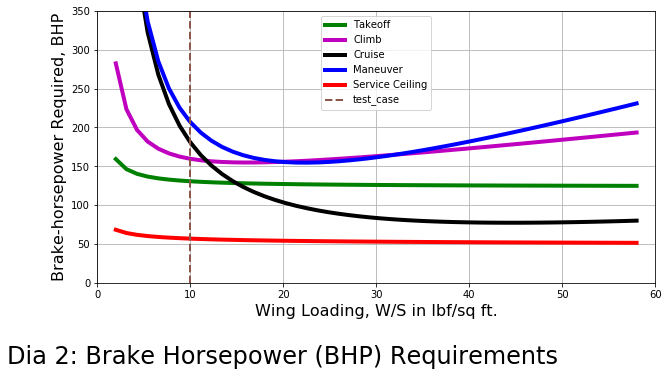

In [37]:
# Plot the brake horsepower functions for various values of WS typically from 2 to 58.  
# Note. the region above the curve is the one we want. 

width = 10.0
height = width /2 # (y_end - y_start)/(x_end - x_start) * width
fig = pyplot.figure(figsize=(width, height))
fig.text(0, -0.1, diag_titles[1], fontsize=24 )

pyplot.grid(True)
pyplot.xlabel(label_ws, fontsize=16)
pyplot.ylabel(label_bhp, fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start_bhp, y_end_bhp)

pyplot.plot(ws, pw_to, color='g', linestyle='-', linewidth=4, label=st[0])
pyplot.plot(ws, pw_climb, color='m', linestyle='-', linewidth=4, label=st[1])
pyplot.plot(ws, pw_cruise, color='k', linestyle='-', linewidth=4, label=st[2])
pyplot.plot(ws, pw_man, color='b', linestyle='-', linewidth=4, label=st[3])
pyplot.plot(ws, pw_sc, color='r', linestyle='-', linewidth=4, label=st[4])

pyplot.axvline(ws[test_case], color='tab:brown', linestyle='--', linewidth=2, label='test_case');

pyplot.legend(loc='best')
pyplot.show();


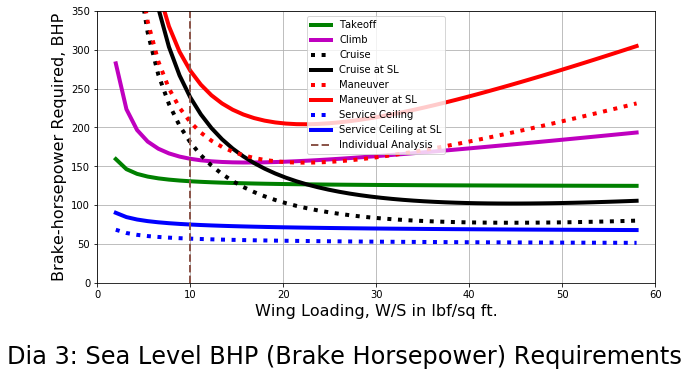

In [38]:
# Step 9 Plot the above function for various values of WS from 5 to 58.  
# Note. the region above the curve is the one we want. 
# to do this, convert the above computations into functions that will take an numpy array of WS values
# and return an array of TW results.

width = 10.0
height = width/2 
fig = pyplot.figure(figsize=(width, height))
fig.text(0, -0.1, diag_titles[2], fontsize=24 )

pyplot.grid(True)
pyplot.xlabel(label_ws, fontsize=16)
pyplot.ylabel(label_bhp, fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start_bhp, y_end_bhp)

pyplot.plot(ws, pw_to, color='g', linestyle='-', linewidth=4, label=st[0])
pyplot.plot(ws, pw_climb, color='m', linestyle='-', linewidth=4, label=st[1])

# The other condition where we might want to derate some engine power ratings is 
# if we want to see the plot of the cruise speed / altitude.  To do this, we would
# have to go back an add another computation cell for tw_cruise.  Doable, but for the
# purposes of conceptual design it does not generally produce a limiting value.
pyplot.plot(ws, pw_cruise, color='k', linestyle=':', linewidth=4, label=st[2])
pyplot.plot(ws, pw_cruise0, color='k', linestyle='-', linewidth=4, label=st[2]+' at SL')

pyplot.plot(ws, pw_man, color='r', linestyle=':', linewidth=4, label=st[3])
pyplot.plot(ws, pw_man0, color='r', linestyle='-', linewidth=4, label=st[3]+' at SL')

pyplot.plot(ws, pw_sc, color='b', linestyle=':', linewidth=4, label=st[4])
pyplot.plot(ws, pw_sc0, color='b', linestyle='-', linewidth=4, label=st[4]+' at SL')


pyplot.axvline(ws[test_case], color='tab:brown', linestyle='--', linewidth=2, label='Individual Analysis');

pyplot.legend(loc='best')
pyplot.show();

## Individual Test Case 

In section 5, we computed a range of horsepowers required for various wing loading situations.  We can look at Dia 3 and estimate a best value, or we can select a specific W/S value and use that to pick explicit values for P/W for the various critical flight states. To accomplish the latter, we use the following code:

Since we already computed our PW and WS in a Numpy array, we can select an item from each array to print the values for our final computation.  

Now that we have calculated a table of thrust to weight for the wing loading in all our flight modes of interest, we want to examine the required horsepower for a specific wing loading.  Basically, what we are doing with the following code is pulling specific power loading and wing loading values from the data underlying the above graph numerically, rather than trying to eyeball it.  We start by visually estimating a spot where our horsepower seems to be minimum then examine the space around our estimate to determine if it is truly the minimum on all values.  We could also write python code to pull the minimum values for each thrust to weight or power to weight condition and see if we can identify the best design point. 

In [39]:
# Compute the wing area and wing span based on the wing loading and Maximum Takeoff Weight (MTOW)!
s_wing = MTOW / ws[test_case]
b = math.sqrt(ar*s_wing)

First we print our requirements.

In [40]:
# Print out our aircraft requirements.
print_aircraft_requirements()



Aircraft Design Requirements


-Design Maximum Takeoff Weight (MTOW) is 2000 pounds.

-Design Stall Speed  (v_stall) is   61 KCAS
-Design Speed for Takeoff (Rotation) (v_to) is   65 KCIA.
-Design Altitude for Takeoff (alt_to) is    0 feet
-
Best Rate of Climb (vertical speed) (roc_sl) is 1500 feet per minute
-Speed for Best Rate of Climb (v-climb) is   80 KCAS.
-Design Altitude for climb (alt_climb) is    0 feet
-Speed for Best Angle of Climb (v-best_aoc) is   70 KCAS.

-Cruise Speed (v_cruise) is  150 KTAS at an altitude of 8000
-Design Altitude for cruise (alt_cruise) is 8000 feet

-Maneuver Speed (v_man) is  150 KTAS
-Design Altitude for maneuvers (level constant velocity turns) (alt_man) is 8000 KCAS

-Cruise Speed (v_cruise) is  150 KTAS
-Design Altitude for maximum speed (alt_max) is 8000 KCAS

-Service Ceiling is 20000 KTAS at roc_sc 100 and  80


Design Assumptions:


-Aspect Ratio (ar) is 9.0 
-Propeller efficiency (np) is 0.80 

Estimated values


-Coefficient of lift at ta

In [41]:
# The \030[1m causes the print statement below print in bold, \030[0m resets it to normal.
print('\033[1m' + '\nCalculated requirements for horsepower:' + '\033[0m' )
print('\nFor an aircraft at MTOW of %4i lbs, and aspect ratio of %4.1f ' %(MTOW, ar))
print('and wing loading of %5.3f. lbf/sq ft.'  %(ws[test_case]))
print('the wing span would be %4.1f feet and the wing area would be %4.1f sq ft.\n' %(b, s_wing))

#pw_to[test_case],pw_climb[test_case],pw_max[test_case],pw_man[test_case],pw_sc[]
#thrust = [MTOW*tw_rot[test_case],  MTOW*tw_climb[test_case], MTOW*tw_max[test_case], MTOW*tw_man[test_case], MTOW*tw_sc[test_case]]
pw = [pw_to[test_case],pw_climb[test_case],pw_cruise[test_case],pw_man[test_case],pw_sc[test_case]]
pw0 = [pw_to[test_case],pw_climb[test_case],pw_cruise0[test_case],pw_man0[test_case],pw_sc0[test_case]]
velocity = [v_to, v_best_roc, v_cruise, v_cruise, v_best_roc]

for i in range(len(st)):
    print('\n %1i) %s requires %3i BHP at %3i knots at altitude of %5i feet.' %(i+1, st[i],pw[i],velocity[i], altitude[i]))
    if pw[i] != pw0[i]:
        print(' %1i-SL) %s requires %3i BHP at %3i knots corrected to SL.' %(i+1, st[i],pw0[i],velocity[i]))


Calculated requirements for horsepower:

For an aircraft at MTOW of 2000 lbs, and aspect ratio of  9.0 
and wing loading of 10.000. lbf/sq ft.
the wing span would be 42.4 feet and the wing area would be 200.0 sq ft.


 1) Takeoff requires 130 BHP at  65 knots at altitude of     0 feet.

 2) Climb requires 159 BHP at  80 knots at altitude of     0 feet.

 3) Cruise requires 181 BHP at 150 knots at altitude of 10000 feet.
 3-SL) Cruise requires 238 BHP at 150 knots corrected to SL.

 4) Maneuver requires 207 BHP at 150 knots at altitude of  8000 feet.
 4-SL) Maneuver requires 273 BHP at 150 knots corrected to SL.

 5) Service Ceiling requires  56 BHP at  80 knots at altitude of 20000 feet.
 5-SL) Service Ceiling requires  75 BHP at  80 knots corrected to SL.


## Stall Speed limits

It is very important to include the stall speed limitations imposed by regulatory authorities when constructing the constraint diagram.  If this is not done, it is possible to select a combination of W/S and T/W that, while meeting the requirements results in a stall speed that is too high.  This information is incorporated into the Constraint Diagram by plotting the isobars for the selected speed  using a second vertical axis.  The maximum lift coefficient for a given stall speed  for a given stall speed is plotted as a function of the wing loading.

REF: <a href="https://www.ecfr.gov/cgi-bin/text-idx?SID=685dc1ae97ae3f5e5569e47880fab01e&mc=true&node=pt14.1.23#se14.1.23_12110">Code of Federal Regulations - Small Airplanes 14 CFR 23.2110   Stall speed.) -- stalling speed.</a>

### CLmax for a desired stall speed

For the purposes of this analysis, the maximum lift coefficient $CLmax$ is considered a function of the wing loading $W/S$ for a constant dynamic pressure, $Q_{stall}$ using the following expression:

$$
CLmax = \frac {1}{q_{stall}}*ws
\tag{SP.1}
$$
for this to work, a target stalling speed is selected and the dynamic pressure at that speed is calculated as in the previous cells.  Repeat the calculations for stall speeds 5 KCAS apart to get the complete picture.



In [42]:
# Using numpy, build our array of stall speed (v_s) values.
n_vs = 50      # Number of values of v_stall that we are going to compute. Has to match n_ws for arrays to work.
vs_start, vs_end = 45, 76       # boundaries of the y-direction -- Thrust Loading T/W 

v_s = numpy.linspace(vs_start, vs_end, n_vs)    # computes a 1D-array for y
v_s_fps = 1.688*v_s

In [43]:
rho_req = 0.002378*math.pow((1-0.0000068756 *alt_to), 4.2561)
vs1 = [40, 45, 50, 55, 60, 61, 65, 70]

vsx_fps = 1.688*vs1[0]
qsx = 0.5*rho_req*numpy.power((vsx_fps), 2)
#CLmax_0 = (1/qsx)*ws_stall
CLmax_0 = (1/qsx)*ws

vsx_fps = 1.688*vs1[1]
qs1 = 0.5*rho_req*numpy.power((vsx_fps), 2)
CLmax_1 = (1/qs1)*ws
    
vsx_fps = 1.688*vs1[2]
qsx = 0.5*rho_req*numpy.power((vsx_fps), 2)
CLmax_2 = (1/qsx)*ws

vsx_fps = 1.688*vs1[3]
qsx = 0.5*rho_req*numpy.power((vsx_fps), 2)
CLmax_3 = (1/qsx)*ws

vsx_fps = 1.688*vs1[4]
qs1 = 0.5*rho_req*numpy.power((vsx_fps), 2)
CLmax_4 = (1/qs1)*ws
    
vsx_fps = 1.688*vs1[5]
qsx = 0.5*rho_req*numpy.power((vsx_fps), 2)
CLmax_5 = (1/qsx)*ws

vsx_fps = 1.688*vs1[6]
qsx = 0.5*rho_req*numpy.power((vsx_fps), 2)
CLmax_6 = (1/qsx)*ws

vsx_fps = 1.688*vs1[7]
qsx = 0.5*rho_req*numpy.power((vsx_fps), 2)
CLmax_7 = (1/qsx)*ws

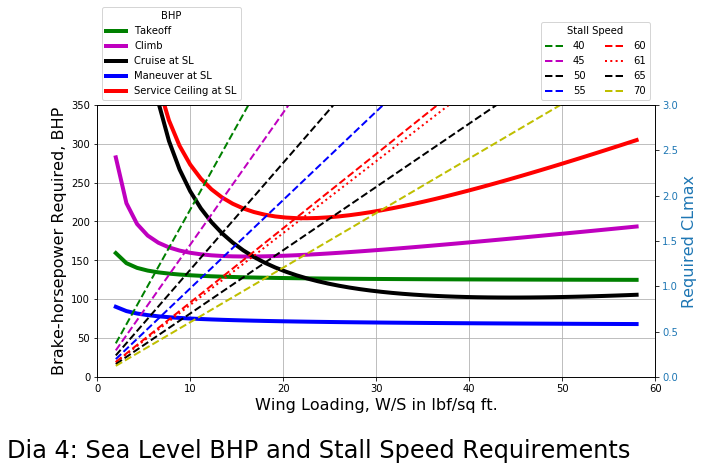

In [44]:
# Step 9 Plot the above function for various values of WS from 5 to 58.  
# Note. the region above the curve is the one we want. 
# to do this, convert the above computations into functions that will take an numpy array of WS values
# and return an array of TW results.

width = 10.0
height = width/2 

fig, ax1 = pyplot.subplots()
fig.set_figheight(height)
fig.set_figwidth(width)
fig.text(0, -0.1, diag_titles[3], fontsize=24 )

ax1.grid()
ax1.set_xlabel(label_ws, fontsize=16)
ax1.set_ylabel(label_bhp, fontsize=16)
ax1.set_xlim(x_start, x_end)
ax1.set_ylim(y_start_bhp, y_end_bhp)

ax1.plot(ws, pw_to, color='g', linestyle='-', linewidth=4, label=st[0])
ax1.plot(ws, pw_climb, color='m', linestyle='-', linewidth=4, label=st[1])
ax1.plot(ws, pw_cruise0, color='k', linestyle='-', linewidth=4, label=st[2]+' at SL')
ax1.plot(ws, pw_sc0, color='b', linestyle='-', linewidth=4, label=st[3]+' at SL')
ax1.plot(ws, pw_man0, color='r', linestyle='-', linewidth=4, label=st[4]+ ' at SL')

ax1.legend(loc='lower left', title='BHP', ncol=1, bbox_to_anchor=(0,1) )

ax2 = ax1.twinx() # instantiate a second axis that shares the same x-axis.
ax2.set_xlim(x_start, x_end)
ax2.set_ylim(0.0, 3.0)

color = 'tab:blue'
ax2.set_ylabel(label_vs, fontsize=16, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.plot(ws, CLmax_0, color='g', linestyle='--', linewidth=2, label=vs1[0])
ax2.plot(ws, CLmax_1, color='m', linestyle='--', linewidth=2, label=vs1[1])
ax2.plot(ws, CLmax_2, color='k', linestyle='--', linewidth=2, label=vs1[2])
ax2.plot(ws, CLmax_3, color='b', linestyle='--', linewidth=2, label=vs1[3])
ax2.plot(ws, CLmax_4, color='r', linestyle='--', linewidth=2, label=vs1[4])
ax2.plot(ws, CLmax_5, color='r', linestyle=':', linewidth=2, label=vs1[5])
ax2.plot(ws, CLmax_6, color='k', linestyle='--', linewidth=2, label=vs1[6])
ax2.plot(ws, CLmax_7, color='y', linestyle='--', linewidth=2, label=vs1[7])

ax2.legend(loc='lower right', title='Stall Speed', ncol=2, bbox_to_anchor=(1,1))

pyplot.show();


In [45]:
# Clean Stall Speed, i.e wing loading the same as takeoff, climb, cruise, and maneuver 
ws_stall = ws[test_case]
#rho_req = 0.002378*math.pow((1-0.0000068756 *alt_to), 4.2561)

v_stall_fps = 1.688*v_stall
print ('Stall Speed is %4.1f fps, or %4.1f KCAS. W/S = %4.2f' %(v_stall_fps, v_stall, ws_stall))

q_stall = 0.5*rho_req*math.pow((v_stall_fps), 2)

CLmax = (1/q_stall)*ws_stall
print ('Air density of %5.4f at %5i altitude produces a dynamic pressure of %5.4f, and a CLmax of %4.2f' %(rho_req, alt_to, q_stall, CLmax))

Stall Speed is 103.0 fps, or 61.0 KCAS. W/S = 10.00
Air density of 0.0024 at     0 altitude produces a dynamic pressure of 12.6063, and a CLmax of 0.79
